In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

# lets prepare data for analysis

In [2]:
uber = pd.read_csv(r'C:\Users\hp\Desktop\Data Analyst\Project\3.Uber\uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv',
                   encoding = 'utf-8')
uber.head(14)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
5,B02617,2015-05-17 09:47:00,B02617,228
6,B02617,2015-05-17 09:47:00,B02617,7
7,B02617,2015-05-17 09:47:00,B02764,74
8,B02617,2015-05-17 09:47:00,B02617,249
9,B02617,2015-05-17 09:47:00,B02764,22


In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14270479 entries, 0 to 14270478
Data columns (total 4 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Dispatching_base_num  object
 1   Pickup_date           object
 2   Affiliated_base_num   object
 3   locationID            int64 
dtypes: int64(1), object(3)
memory usage: 435.5+ MB


In [4]:
uber.describe()

,locationID
count,1.427048e+07
mean,1.520574e+02
std,7.159620e+01
min,1.000000e+00
25%,9.200000e+01
50%,1.570000e+02
75%,2.300000e+02
max,2.650000e+02


In [5]:
uber.duplicated()

0           False
1           False
2           False
3           False
4           False
            ...  
14270474    False
14270475    False
14270476    False
14270477    False
14270478    False
Length: 14270479, dtype: bool

In [6]:
uber.duplicated().sum()

898225

In [7]:
uber.drop_duplicates(inplace=True)

In [8]:
uber.shape

(13372254, 4)

In [9]:
uber.duplicated().sum()

0

In [10]:
uber.head(20)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
5,B02617,2015-05-17 09:47:00,B02617,228
6,B02617,2015-05-17 09:47:00,B02617,7
7,B02617,2015-05-17 09:47:00,B02764,74
8,B02617,2015-05-17 09:47:00,B02617,249
9,B02617,2015-05-17 09:47:00,B02764,22


In [11]:
uber.isnull().sum()

Dispatching_base_num         0
Pickup_date                  0
Affiliated_base_num     160702
locationID                   0
dtype: int64

In [12]:
uber['Affiliated_base_num'].isnull().head(n=10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Affiliated_base_num, dtype: bool

# 1P -> Which month have max uber pickup in NY city

so here bascially if we get two feature i.e Month and count so we can easily plot the graph and tell max pickup

In [13]:
uber['Pickup_date'] = pd.to_datetime(uber['Pickup_date'], format='%Y-%m-%d %H:%M:%S')


In [14]:
uber.head(14)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
5,B02617,2015-05-17 09:47:00,B02617,228
6,B02617,2015-05-17 09:47:00,B02617,7
7,B02617,2015-05-17 09:47:00,B02764,74
8,B02617,2015-05-17 09:47:00,B02617,249
9,B02617,2015-05-17 09:47:00,B02764,22


In [15]:
uber

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45


In [16]:
print(len(uber))

13372254


In [17]:
uber['Month'] = uber['Pickup_date'].dt.month

In [18]:
uber

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month
0,B02617,2015-05-17 09:47:00,B02617,141,5
1,B02617,2015-05-17 09:47:00,B02617,65,5
2,B02617,2015-05-17 09:47:00,B02617,100,5
3,B02617,2015-05-17 09:47:00,B02774,80,5
4,B02617,2015-05-17 09:47:00,B02617,90,5
...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,5
14270475,B02765,2015-05-08 15:43:00,B02765,263,5
14270476,B02765,2015-05-08 15:43:00,B02765,90,5
14270477,B02765,2015-05-08 15:44:00,B01899,45,5


<AxesSubplot:>

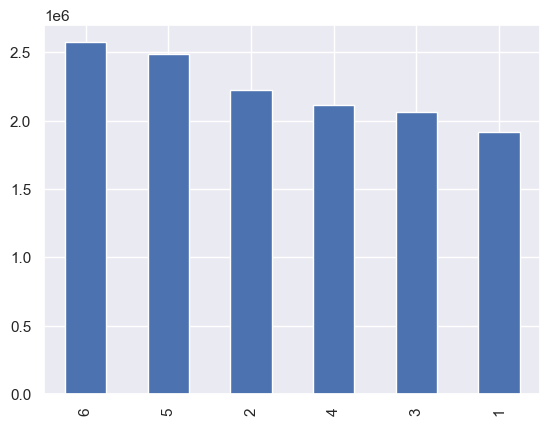

In [19]:
uber['Month'].value_counts().plot(kind='bar')

In [20]:
uber['Month'].value_counts()

6    2571771
5    2483980
2    2222189
4    2112705
3    2062639
1    1918970
Name: Month, dtype: int64

In [21]:
uber['Hour'] = uber['Pickup_date'].dt.hour

In [22]:
uber

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Hour
0,B02617,2015-05-17 09:47:00,B02617,141,5,9
1,B02617,2015-05-17 09:47:00,B02617,65,5,9
2,B02617,2015-05-17 09:47:00,B02617,100,5,9
3,B02617,2015-05-17 09:47:00,B02774,80,5,9
4,B02617,2015-05-17 09:47:00,B02617,90,5,9
...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,5,15
14270475,B02765,2015-05-08 15:43:00,B02765,263,5,15
14270476,B02765,2015-05-08 15:43:00,B02765,90,5,15
14270477,B02765,2015-05-08 15:44:00,B01899,45,5,15


In [23]:
uber['Hour'].value_counts()

19    928175
18    910605
20    872198
21    851426
22    844112
17    803914
23    747613
16    691959
15    614392
9     564992
0     557302
14    556650
8     555338
13    514730
12    510338
10    498806
11    495523
7     426073
1     368383
6     279978
2     246387
5     189086
3     176216
4     168058
Name: Hour, dtype: int64

<AxesSubplot:>

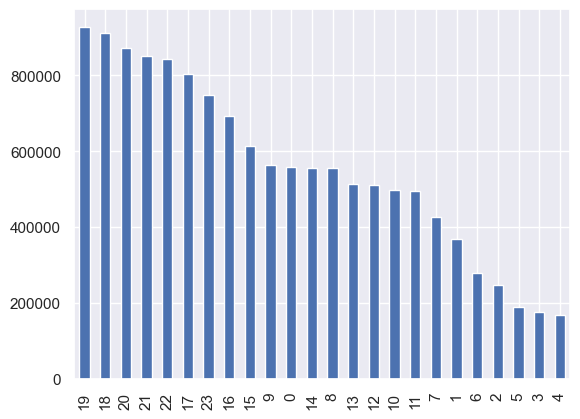

In [24]:
uber['Hour'].value_counts().plot(kind='bar')

# 2P--> Find out total trips for each month and each weekdays

In [25]:
uber

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Hour
0,B02617,2015-05-17 09:47:00,B02617,141,5,9
1,B02617,2015-05-17 09:47:00,B02617,65,5,9
2,B02617,2015-05-17 09:47:00,B02617,100,5,9
3,B02617,2015-05-17 09:47:00,B02774,80,5,9
4,B02617,2015-05-17 09:47:00,B02617,90,5,9
...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,5,15
14270475,B02765,2015-05-08 15:43:00,B02765,263,5,15
14270476,B02765,2015-05-08 15:43:00,B02765,90,5,15
14270477,B02765,2015-05-08 15:44:00,B01899,45,5,15


In [26]:
uber['Weekdays'] = uber['Pickup_date'].dt.weekday

In [27]:
uber

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Hour,Weekdays
0,B02617,2015-05-17 09:47:00,B02617,141,5,9,6
1,B02617,2015-05-17 09:47:00,B02617,65,5,9,6
2,B02617,2015-05-17 09:47:00,B02617,100,5,9,6
3,B02617,2015-05-17 09:47:00,B02774,80,5,9,6
4,B02617,2015-05-17 09:47:00,B02617,90,5,9,6
...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,5,15,4
14270475,B02765,2015-05-08 15:43:00,B02765,263,5,15,4
14270476,B02765,2015-05-08 15:43:00,B02765,90,5,15,4
14270477,B02765,2015-05-08 15:44:00,B01899,45,5,15,4


In [28]:
uber['Weekdays_name'] = uber['Pickup_date'].dt.day_name()

In [29]:
uber

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Hour,Weekdays,Weekdays_name
0,B02617,2015-05-17 09:47:00,B02617,141,5,9,6,Sunday
1,B02617,2015-05-17 09:47:00,B02617,65,5,9,6,Sunday
2,B02617,2015-05-17 09:47:00,B02617,100,5,9,6,Sunday
3,B02617,2015-05-17 09:47:00,B02774,80,5,9,6,Sunday
4,B02617,2015-05-17 09:47:00,B02617,90,5,9,6,Sunday
...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,5,15,4,Friday
14270475,B02765,2015-05-08 15:43:00,B02765,263,5,15,4,Friday
14270476,B02765,2015-05-08 15:43:00,B02765,90,5,15,4,Friday
14270477,B02765,2015-05-08 15:44:00,B01899,45,5,15,4,Friday


In [30]:
uber['Month_name'] = uber['Pickup_date'].dt.month_name()

In [31]:
uber

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Hour,Weekdays,Weekdays_name,Month_name
0,B02617,2015-05-17 09:47:00,B02617,141,5,9,6,Sunday,May
1,B02617,2015-05-17 09:47:00,B02617,65,5,9,6,Sunday,May
2,B02617,2015-05-17 09:47:00,B02617,100,5,9,6,Sunday,May
3,B02617,2015-05-17 09:47:00,B02774,80,5,9,6,Sunday,May
4,B02617,2015-05-17 09:47:00,B02617,90,5,9,6,Sunday,May
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,5,15,4,Friday,May
14270475,B02765,2015-05-08 15:43:00,B02765,263,5,15,4,Friday,May
14270476,B02765,2015-05-08 15:43:00,B02765,90,5,15,4,Friday,May
14270477,B02765,2015-05-08 15:44:00,B01899,45,5,15,4,Friday,May


In [32]:
uber.columns.values

array(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'Month', 'Hour', 'Weekdays', 'Weekdays_name',
       'Month_name'], dtype=object)

In [33]:
col_values = ['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'Month','Month_name', 'Hour', 'Weekdays', 'Weekdays_name']

In [34]:
uber = uber[col_values]

In [35]:
uber

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Month_name,Hour,Weekdays,Weekdays_name
0,B02617,2015-05-17 09:47:00,B02617,141,5,May,9,6,Sunday
1,B02617,2015-05-17 09:47:00,B02617,65,5,May,9,6,Sunday
2,B02617,2015-05-17 09:47:00,B02617,100,5,May,9,6,Sunday
3,B02617,2015-05-17 09:47:00,B02774,80,5,May,9,6,Sunday
4,B02617,2015-05-17 09:47:00,B02617,90,5,May,9,6,Sunday
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,5,May,15,4,Friday
14270475,B02765,2015-05-08 15:43:00,B02765,263,5,May,15,4,Friday
14270476,B02765,2015-05-08 15:43:00,B02765,90,5,May,15,4,Friday
14270477,B02765,2015-05-08 15:44:00,B01899,45,5,May,15,4,Friday


In [36]:
df = uber.copy()

In [37]:
df

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month,Month_name,Hour,Weekdays,Weekdays_name
0,B02617,2015-05-17 09:47:00,B02617,141,5,May,9,6,Sunday
1,B02617,2015-05-17 09:47:00,B02617,65,5,May,9,6,Sunday
2,B02617,2015-05-17 09:47:00,B02617,100,5,May,9,6,Sunday
3,B02617,2015-05-17 09:47:00,B02774,80,5,May,9,6,Sunday
4,B02617,2015-05-17 09:47:00,B02617,90,5,May,9,6,Sunday
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,5,May,15,4,Friday
14270475,B02765,2015-05-08 15:43:00,B02765,263,5,May,15,4,Friday
14270476,B02765,2015-05-08 15:43:00,B02765,90,5,May,15,4,Friday
14270477,B02765,2015-05-08 15:44:00,B01899,45,5,May,15,4,Friday


In [38]:
df.groupby(['Month' , 'Weekdays_name'])


In [39]:
df.groupby(['Month' , 'Weekdays_name']).size()

Month  Weekdays_name
1      Friday           339285
       Monday           190606
       Saturday         386049
       Sunday           230487
       Thursday         330319
       Tuesday          196574
       Wednesday        245650
2      Friday           373550
       Monday           274948
       Saturday         368311
       Sunday           296130
       Thursday         335603
       Tuesday          287260
       Wednesday        286387
3      Friday           309631
       Monday           269931
       Saturday         314785
       Sunday           313865
       Thursday         277026
       Tuesday          320634
       Wednesday        256767
4      Friday           315002
       Monday           238429
       Saturday         324545
       Sunday           273560
       Thursday         372522
       Tuesday          250632
       Wednesday        338015
5      Friday           430134
       Monday           255501
       Saturday         464298
       Sunday     

In [40]:
df.groupby(['Month' , 'Weekdays_name']).size().value_counts()

339285    1
390391    1
324545    1
273560    1
372522    1
250632    1
338015    1
430134    1
255501    1
464298    1
337607    1
190606    1
290004    1
316045    1
371225    1
375312    1
399377    1
334434    1
357782    1
405500    1
238429    1
315002    1
256767    1
320634    1
386049    1
230487    1
330319    1
196574    1
245650    1
373550    1
274948    1
368311    1
296130    1
335603    1
287260    1
286387    1
309631    1
269931    1
314785    1
313865    1
277026    1
328141    1
dtype: int64

In [41]:
type(df.groupby(['Month' , 'Weekdays_name']).size())

pandas.core.series.Series

so here you can see that this is series so what we can do we can convert into dataframe either by converting into dictionory
pd.to_dic() or by putting as_index=False

In [42]:
df.groupby(['Month' , 'Weekdays_name'], as_index=False).size()

,Month,Weekdays_name,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319
5,1,Tuesday,196574
6,1,Wednesday,245650
7,2,Friday,373550
8,2,Monday,274948
9,2,Saturday,368311


In [43]:
temp = df.groupby(['Month' , 'Weekdays_name'], as_index=False).size()
temp

,Month,Weekdays_name,size
0,1,Friday,339285
1,1,Monday,190606
2,1,Saturday,386049
3,1,Sunday,230487
4,1,Thursday,330319
5,1,Tuesday,196574
6,1,Wednesday,245650
7,2,Friday,373550
8,2,Monday,274948
9,2,Saturday,368311


In [45]:
temp['Month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

so we want that where there is 1 so it should say Jan like wise 2-Feb , 3- MArch

so for that we take unique value for month and then conver to dictory by providing key as number and values as month name

In [47]:
dict_month = {1:'Jan' , 2:'Feb', 3:'March', 4:'APril', 5:'May', 6:'June'}

In [48]:
#now we map month
temp['Month'] = temp['Month'].map(dict_month)

In [49]:
temp['Month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
5       Jan
6       Jan
7       Feb
8       Feb
9       Feb
10      Feb
11      Feb
12      Feb
13      Feb
14    March
15    March
16    March
17    March
18    March
19    March
20    March
21    APril
22    APril
23    APril
24    APril
25    APril
26    APril
27    APril
28      May
29      May
30      May
31      May
32      May
33      May
34      May
35     June
36     June
37     June
38     June
39     June
40     June
41     June
Name: Month, dtype: object

In [50]:
temp

,Month,Weekdays_name,size
0,Jan,Friday,339285
1,Jan,Monday,190606
2,Jan,Saturday,386049
3,Jan,Sunday,230487
4,Jan,Thursday,330319
5,Jan,Tuesday,196574
6,Jan,Wednesday,245650
7,Feb,Friday,373550
8,Feb,Monday,274948
9,Feb,Saturday,368311


In [51]:
df.groupby(['Month_name' , 'Weekdays_name']).size()

Month_name  Weekdays_name
April       Friday           315002
            Monday           238429
            Saturday         324545
            Sunday           273560
            Thursday         372522
            Tuesday          250632
            Wednesday        338015
February    Friday           373550
            Monday           274948
            Saturday         368311
            Sunday           296130
            Thursday         335603
            Tuesday          287260
            Wednesday        286387
January     Friday           339285
            Monday           190606
            Saturday         386049
            Sunday           230487
            Thursday         330319
            Tuesday          196574
            Wednesday        245650
June        Friday           371225
            Monday           375312
            Saturday         399377
            Sunday           334434
            Thursday         357782
            Tuesday          405500
  

In [52]:
ss = df.groupby(['Month_name' , 'Weekdays_name']).size()
ss

Month_name  Weekdays_name
April       Friday           315002
            Monday           238429
            Saturday         324545
            Sunday           273560
            Thursday         372522
            Tuesday          250632
            Wednesday        338015
February    Friday           373550
            Monday           274948
            Saturday         368311
            Sunday           296130
            Thursday         335603
            Tuesday          287260
            Wednesday        286387
January     Friday           339285
            Monday           190606
            Saturday         386049
            Sunday           230487
            Thursday         330319
            Tuesday          196574
            Wednesday        245650
June        Friday           371225
            Monday           375312
            Saturday         399377
            Sunday           334434
            Thursday         357782
            Tuesday          405500
  

# 3P --> Analysing the hourly demand of uber

In [56]:
Hr = df.groupby(['Weekdays_name','Hour']).size()

In [57]:
Hr

Weekdays_name  Hour
Friday         0        79879
               1        44563
               2        27252
               3        19076
               4        23049
                        ...  
Wednesday      19      131317
               20      123490
               21      120941
               22      115208
               23       91631
Length: 168, dtype: int64